# Assignment 2

This assignment serves as a comprehensive evaluation of your machine learning skills, encompassing not only the technical aspects of model development but also your ability to analyze, interpret, and present data insights effectively. As such, it's essential to ensure that your submission is complete, functional, and devoid of any obvious gaps, as if you were delivering this project to a client.

To achieve this, leverage the full capabilities of Markdown and the interactive visualization tools available in Jupyter notebooks to craft a well-structured and visually appealing report of your findings. Your report should clearly communicate the insights you've gained from the exploratory data analysis, the rationale behind your data preprocessing and feature engineering decisions, and a thorough analysis of feature importance. High-quality visualizations and well-organized documentation will not only support your analysis but also make your results more accessible and understandable to your audience.

Remember, the ability to present complex results in an intuitive and engaging manner is a crucial skill, almost as important as the technical proficiency in model building and data analysis. Treat this assignment as an opportunity to showcase your skills in both areas.

## Instructions
- Your submission should be a `.ipynb` file with your name,
  like `FirstnameLastname.ipynb`. It should include the answers to the questions in markdown cells, your data analysis and results.
- You are expected to follow the best practices for code writing and model
training. Poor coding style will be penalized.
- You are allowed to discuss ideas with your peers, but no sharing of code.
Plagiarism in the code will result in failing. If you use code from the
internet, cite it by adding the source of the code as a comment in the first line of the code cell. [Academic misconduct policy](https://wiki.innopolis.university/display/DOE/Academic+misconduct+policy)
- In real life clients can give unclear goals or requirements. So, if the instructions seem vague, use common sense to make reasonable assumptions and decisions.

## Self-Reliance and Exploration
In this task, you're encouraged to rely on your resourcefulness and creativity. Dive into available resources, experiment with various solutions, and learn from every outcome. While our team is here to clarify task details and offer conceptual guidance, we encourage you to first seek answers independently. This approach is vital for developing your problem-solving skills in machine learning.



# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (50%)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more about Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/)


## What You Need to Do
In this task, you are required to employ a fully connected feed-forward Artificial Neural Network (ANN) to tackle a classification problem. This involves several key steps, each critical to the development and performance of your model:

- **Exploratory Data Analysis (EDA) (10%)**: Begin by conducting a thorough exploratory analysis of the provided dataset. Your goal here is to uncover patterns, anomalies, relationships, or trends that could influence your modeling decisions. **Share the insights** you gather from this process and explain how they informed your subsequent steps.
  
- **Data Preprocessing and Feature Engineering (10%)**: Based on your EDA insights, choose and implement the most appropriate data preprocessing steps and feature engineering techniques. This may include handling missing values, encoding categorical variables, normalizing data, and creating new features that could enhance your model's ability to learn from the data.
  
- **Model Design and Training (10%)**: Design a fully connected feed-forward ANN model. You will need to experiment with different architectures, layer configurations, and hyperparameters to find the most effective solution for the classification problem at hand.

- **Feature Importance Analysis (10%)**: After developing your model, analyze which features are most important for making predictions. Discuss how this analysis aligns with your initial EDA insights and what it reveals about the characteristics most indicative of specific user behaviors or identities.

- **Evaluation (10%)**: You will be required to submit your model prediction on a hidden data set.

### Data
You will be using the data in `Task_1.json` to identify Waldo (`user_id=0`). The dataset includes:
- **"browser", "os" and "locale"**: Information about the software used.
- **"user_id"**: A unique identifier for each user.
- **"location"**: Geolocation based on the IP address used.
- **"sites"**: A list of visited URLs and the time spent there in seconds.
- **"time" and "date"**: When the session started in GMT.


### Evaluation
After training, evaluate your model by printing the classification report on your test set. Then, predict whether each user in `task_1_verify.json` is Waldo or not, by adding the boolean `is_waldo` property to the `task_1_verify.json`:

```diff
  [
    {
+     "is_waldo": false,
      "browser": "Chrome",
      "os": "Debian",
      "locale": "ur-PK",
      "location": "Russia/Moscow",
      "sites": [
          // ...
      ],
      "time": "04:12:00",
      "date":"2017-06-29"
    }
    // ...
  ]

```

## Learning Objectives

- **Exploratory Data Analysis**: Apply suitable analysis techniques to gain insights and better understand the dataset.
- **Classification Approach**: Identify the most appropriate method for the given problem.
- **Data Preprocessing**: Select and execute proper preprocessing and encoding techniques.
- **Model Implementation**: Utilize ANNs to address a classification problem, including training, validation, and testing phases.
- **Feature Importance Analysis**: Determine and report which features are most critical for the model's predictions to uncover insights into specific user behaviors.

In [315]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
from sklearn.base import ClassifierMixin


In [316]:
X_train = pd.read_json("task_1_train_data.json")

print(X_train.columns)
print("First few rows of the dataset:")
print(X_train.head())

print("\nData types and missing values:")
print(X_train.info())

print("\nSummary statistics for numerical features:")
print(X_train.describe())

print("\nUnique values for categorical features:")
print("Browser:", X_train["browser"].unique())
print("OS:", X_train["os"].unique())
print("Locale:", X_train["locale"].unique())
print("Location:", X_train["location"].unique())

print("\nDistribution of target variable (user_id):")
print(X_train["user_id"].value_counts())

print("\nPatterns or anomalies:")
print(X_train[X_train["user_id"] == 0].groupby(["browser", "os", "location"]).size().nlargest(10))

Index(['browser', 'os', 'locale', 'user_id', 'location', 'sites', 'time',
       'date'],
      dtype='object')
First few rows of the dataset:
   browser         os locale  user_id           location  \
0   Chrome     Debian  ur-PK      116      Russia/Moscow   
1  Firefox  Windows 8  uk-UA      155       France/Paris   
2   Safari      MacOS  fr-FR       39        Japan/Tokyo   
3   Chrome  Windows 8  nl-NL      175   Australia/Sydney   
4  Firefox     Ubuntu  ro-RO       50  USA/San Francisco   

                                               sites      time       date  
0  [{'site': 'bing.net', 'length': 52}, {'site': ...  04:12:00 2017-06-29  
1  [{'site': 'yahoo.com', 'length': 46}, {'site':...  03:57:00 2016-03-23  
2            [{'site': 'oracle.com', 'length': 335}]  05:26:00 2016-11-17  
3  [{'site': 'mail.google.com', 'length': 192}, {...  00:05:00 2016-08-23  
4  [{'site': 'mail.google.com', 'length': 266}, {...  22:55:00 2016-07-23  

Data types and missing values:
<class '

In [317]:
X_train.fillna({"os": "Unknown", "locale": "Unknown", "location": "Unknown"}, inplace=True)

cat_columns = ["browser", "os", "locale", "location"]
X_encoded = pd.get_dummies(X_train.drop(columns=["user_id", "sites", "time", "date"]), columns=cat_columns)

X_train["hour"] = (pd.to_datetime(X_train["time"]).dt.hour)
X_train["minute"] = (pd.to_datetime(X_train["time"]).dt.minute)
X_train["second"] = (pd.to_datetime(X_train["time"]).dt.second)
X_train = X_train.drop(['time'], axis=1)
X = pd.concat([X_encoded, X_train[["hour", "minute", "second"]]], axis=1)
y = X_train["user_id"] == 0

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(data.columns)

scaler = StandardScaler()
X_train[["hour", "minute", "second"]] = scaler.fit_transform(X_train[["hour", "minute", "second"]])
X_test[["hour", "minute", "second"]] = scaler.transform(X_test[["hour", "minute", "second"]])
# print(data.columns)

# Train the model
# model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
# model.fit(X_train, y_train)

# # Evaluate the model
# y_pred = model.predict(X_test)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


C:\Users\Chulpan\AppData\Local\Temp\ipykernel_19880\1524134111.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train["hour"] = (pd.to_datetime(X_train["time"]).dt.hour)
C:\Users\Chulpan\AppData\Local\Temp\ipykernel_19880\1524134111.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train["minute"] = (pd.to_datetime(X_train["time"]).dt.minute)
C:\Users\Chulpan\AppData\Local\Temp\ipykernel_19880\1524134111.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X_train["second"] = (pd.to_datetime(X_train["time"]).dt.second)


In [318]:
X.head()

,browser_Chrome,browser_Firefox,browser_Internet Explorer,browser_Safari,os_Debian,os_MacOS,os_Ubuntu,os_Windows 10,os_Windows 7,os_Windows 8,...,location_Singapore/Singapore,location_Spain/Madrid,location_UK/London,location_USA/Chicago,location_USA/Miami,location_USA/New York,location_USA/San Francisco,hour,minute,second
0,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,4,12,0
1,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,3,57,0
2,False,False,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,5,26,0
3,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,0,5,0
4,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,22,55,0


In [319]:
import tensorflow as tf

# Define the architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(len(X_train.columns),)),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


c:\Users\Chulpan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_57 (Dense)                │ (None, 100)            │         6,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,101 (43.36 KB)

 Trainable params: 11,101 (43.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9830 - loss: 0.0804 - val_accuracy: 0.9959 - val_loss: 0.0134
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9949 - loss: 0.0154 - val_accuracy: 0.9964 - val_loss: 0.0126
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9949 - loss: 0.0145 - val_accuracy: 0.9969 - val_loss: 0.0107
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9961 - loss: 0.0124 - val_accuracy: 0.9969 - val_loss: 0.0104
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9954 - loss: 0.0133 - val_accuracy: 0.9970 - val_loss: 0.0115
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9950 - loss: 0.0141 - val_accuracy: 0.9969 - val_loss: 0.0101
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9957 - loss: 0.0118 - val_accuracy: 0.9969 - val_loss: 0.0097
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9950 - loss: 0.0136 - val_accuracy: 0.

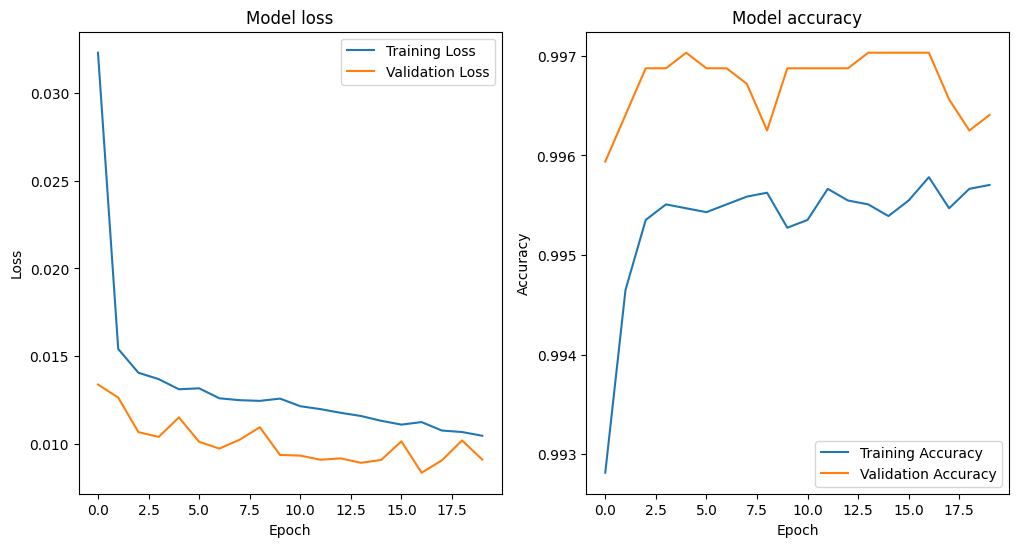

In [320]:
import matplotlib.pyplot as plt

# Train the model
hist = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 6))

    # Plot training & validation loss values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_history(hist)


In [321]:
import seaborn as sns

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      7964
        True       0.73      0.53      0.61        36

    accuracy                           1.00      8000
   macro avg       0.86      0.76      0.81      8000
weighted avg       1.00      1.00      1.00      8000



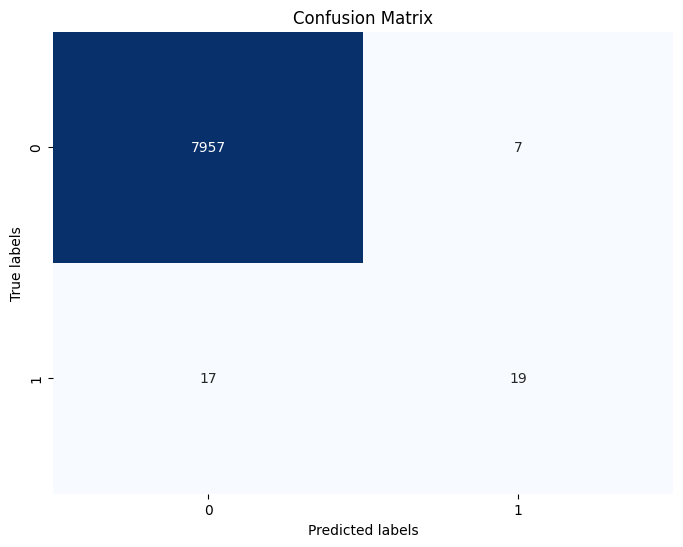

In [322]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)


In [323]:
import json
import pandas as pd

verify_df = pd.read_json('task_1_verify.json')

verify_df.fillna({"os": "Unknown", "locale": "Unknown", "location": "Unknown"}, inplace=True)

cat_columns = ["browser", "os", "locale", "location"]
X_encoded = pd.get_dummies(verify_df.drop(columns=["sites", "time", "date"]), columns=cat_columns)

verify_df["hour"] = (pd.to_datetime(verify_df["time"]).dt.hour)
verify_df["minute"] = (pd.to_datetime(verify_df["time"]).dt.minute)
verify_df["second"] = (pd.to_datetime(verify_df["time"]).dt.second)
verify_df = verify_df.drop(['time'], axis=1)
verify_X = pd.concat([X_encoded, verify_df[["hour", "minute", "second"]]], axis=1)

scaler = StandardScaler()
verify_X[["hour", "minute", "second"]] = scaler.fit_transform(verify_X[["hour", "minute", "second"]])
verify_X[["hour", "minute", "second"]] = scaler.transform(verify_X[["hour", "minute", "second"]])

is_waldo = (model.predict(verify_X) > 0.5).astype(int)

C:\Users\Chulpan\AppData\Local\Temp\ipykernel_19880\703329800.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  verify_df["hour"] = (pd.to_datetime(verify_df["time"]).dt.hour)
C:\Users\Chulpan\AppData\Local\Temp\ipykernel_19880\703329800.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  verify_df["minute"] = (pd.to_datetime(verify_df["time"]).dt.minute)
C:\Users\Chulpan\AppData\Local\Temp\ipykernel_19880\703329800.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  verify_df["second"] = (pd.to_datetime(verify_df["time"]).dt.second)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 675us/step


In [324]:
is_waldo.sum()

116